In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
IMG_DIR = 'tests/data/'

### Preprocessing of images using OpenCV

We will write basic functions for different preprocessing methods 
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching. 

Different methods can come in handy with different kinds of images. 

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

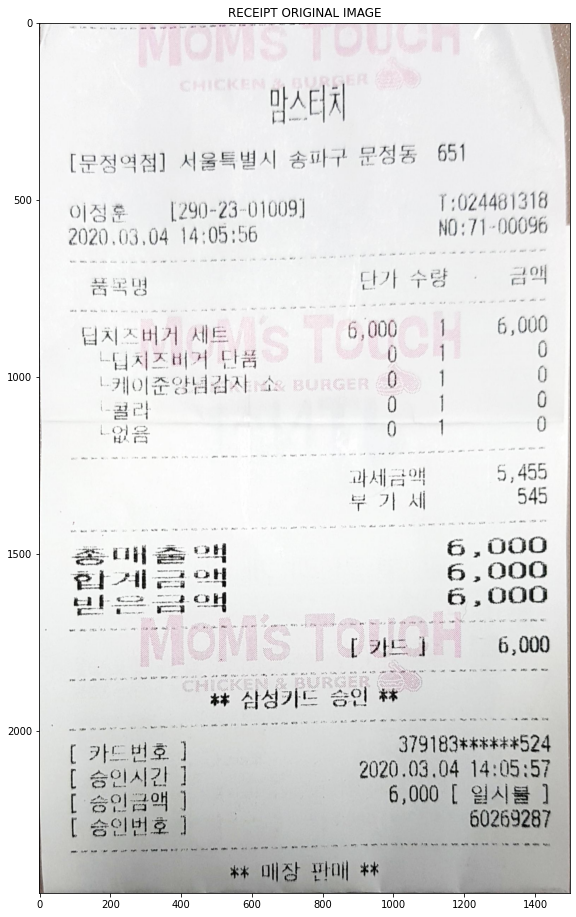

In [4]:
# Plot original image

image = cv2.imread(IMG_DIR + 'pdf00001.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(20,16))
plt.imshow(rgb_img)
plt.title('RECEIPT ORIGINAL IMAGE')
plt.show()

In [5]:
# Preprocess image 

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

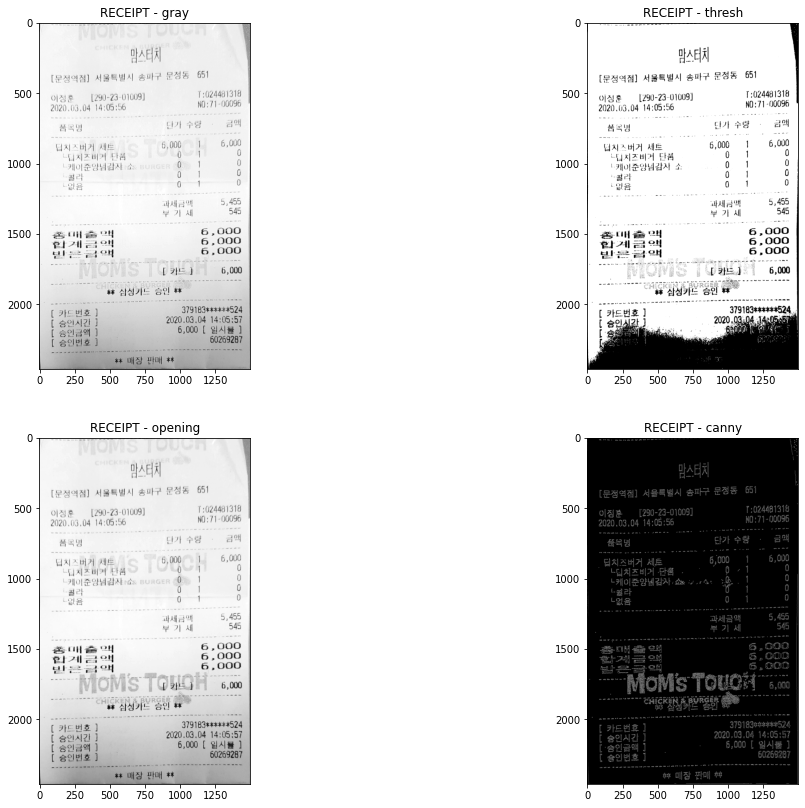

In [6]:
# Plot images after preprocessing

fig = plt.figure(figsize=(18,14))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('RECEIPT - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    

In [7]:
# Get OCR output using Pytesseract

custom_config = r'-l kor --oem 3 --psm 6 -c preserve_interword_spaces=1'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(thresh, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(opening, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(canny, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
맘스터지
[문점역점] 서울특별시 송파구 문정동 651
이정훈 [290~23-01009]            1;024481318
2020.03,04 14;05156 10:71-00096
ㆍ 、 듬목명          단가 수량 ㆍ 겸액
- 덤치즈버거 세트 6,000 1  6.000
-   ㄴ디치즈버커 단품      01    0
-케이준양념감자 수     06 1    0
-폴라            0 ㅣ    때
ㄴ없음            0    0
과세금액     5 ,495
6.                   부기세      545
종 11 줄 2벅           6 ,000
흐| 겨| 금 은비          6 ,000
[루바뚜어이 이이 이루      6000
도       379183444444524
[ 승일서가!        2020.03.04 14105157 |
| 승입어 000 이새


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
맘스터지
[문정역접] 서울특별시 송파구 문정동 651
이정훈  [290-23-01009]         [;024481318
2020,.03,04 14:05156              \0 ;: 71 00096
  품목별          단가 수량 ㆍ 겸액
- 덤치즈버커 세트        6.000 1 _ 6.000
    느디치즈비거 단품         0 1      0
「케이준앙념감자 소      0 ㅣ     0
-콜라           0 ㅣ    0
없음                0 1      0
과세금액   

In [21]:
custom_config = r'-l kor --oem 3 --psm 6'
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(thresh, config=custom_config))
print('\n-----------------------------------------')



-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
맘스터지
[문정역접] 서울특별시 송파구 문정동 651
이성훈  [290-23-01009]         [;024481318
2020.03,04 14:05156              \0 ;: 71 00096
  품목별          단가 수량 ㆍ 겸액
- 덤치즈버커 세트        6.000 1 _ _6.000
,    느디치즈비거 단품         0 1      0
「케이준앙념감자 소      0 ㅣ     0
콜라           0 」ｌ    0
없음                0 1      0
과세금맥                5455
                      부기세      545
종 1 즐 벅                            6.000
한} | 극 으비                            6 .000
볼튼 글 의      6 .000
이엘 + "삼성 |드 슴 인  "7
[ 카드번호 ]            379163*44*4524 .
- [ 승인시간 ]       . _200.03.0474106560
[ 승이빠래벨리. 이 . 60000

-----------------------------------------


In [8]:
custom_config = r'-l kor --oem 3 --psm 6'
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(opening, config=custom_config))
print('\n-----------------------------------------')



-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
   매 여 ~ 새 = 에 = ~ 매 0 … …… 수 00000 으
맘스터치
[문정역점] 서울특별시 송파구 문정동 651

이정훈 [290-23-01009]            1:024401318
2020.03,04 14;05156              \0:71-00096
 품목명          단가 수량 ㆍ 금액
 덤치즈버커 뻐트      6000 ㅣ 6.000
-닙치즈비켜 단품       내    0

-케이준양념람자1@* 00060 606!    0
없음                  0   1       0
과세금액 5455
해             부기세    545
종 1 슬 4                6 ,000
함계글           6 .000
받은글여 , ,     .6.000
-|니이16 1 0090 6

실기 골인테 |

| 카메오          91805

! 숭입2  0”     “~ 2000.03 04 14109130


-----------------------------------------


### Bounding box information using Pytesseract

While running and image through the tesseract OCR engine, pytesseract allows you to get bounding box imformation 
- on a character level
- on a word level
- based on a regex template

We will see how to obtain both

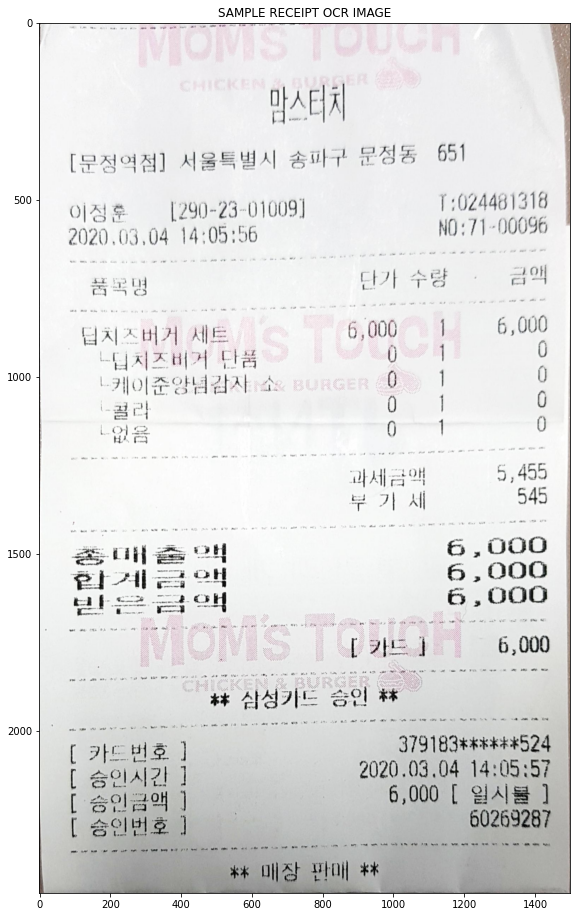

In [9]:
# Plot original image

image = cv2.imread(IMG_DIR + 'pdf00001.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(20,16))
plt.imshow(rgb_img)
plt.title('SAMPLE RECEIPT OCR IMAGE')
plt.show()

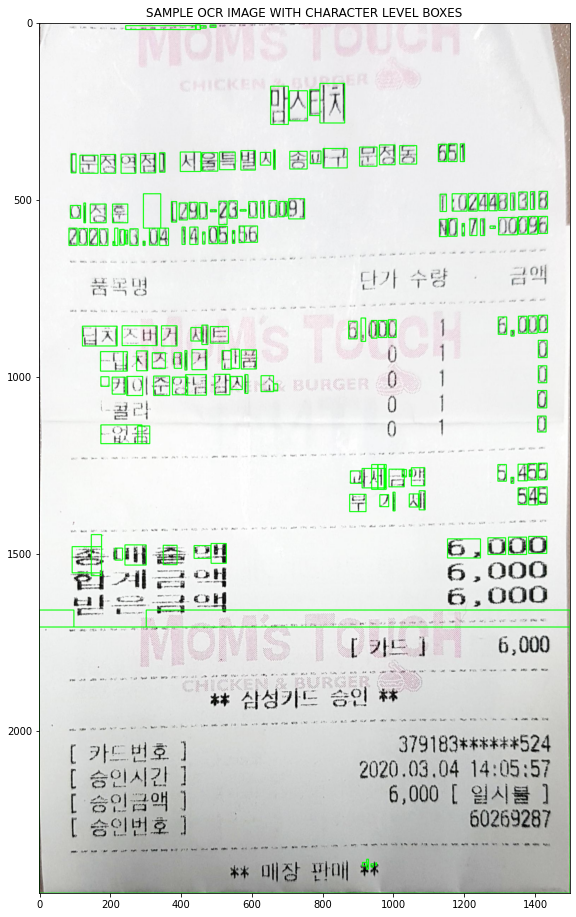

In [10]:
# Plot character boxes on image using pytesseract.image_to_boxes() function

image = cv2.imread(IMG_DIR + 'pdf00001.jpg')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(20,16))
plt.imshow(rgb_img)
plt.title('SAMPLE OCR IMAGE WITH CHARACTER LEVEL BOXES')
plt.show()

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


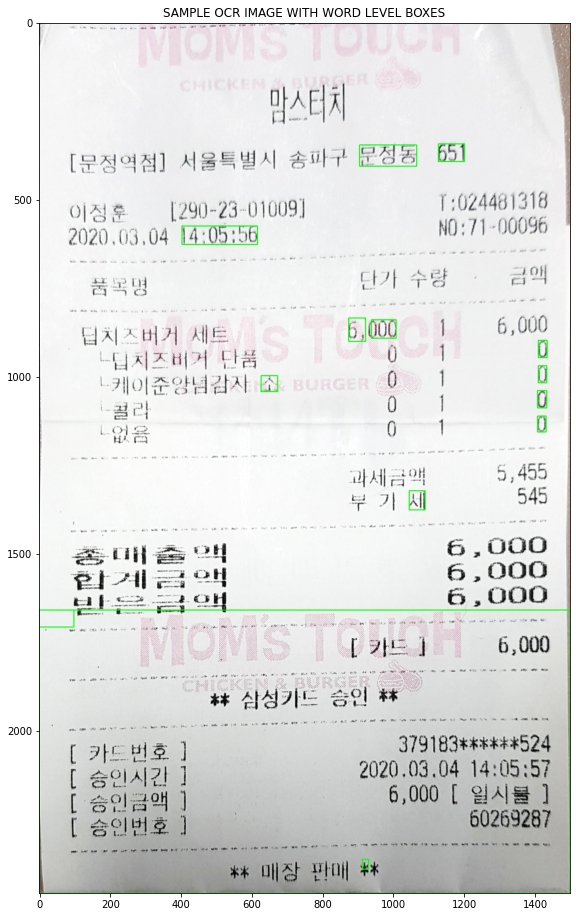

In [13]:
# Plot word boxes on image using pytesseract.image_to_data() function

image = cv2.imread(IMG_DIR + 'pdf00001.jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(float(d['conf'][i])) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(20,16))
plt.imshow(rgb_img)
plt.title('SAMPLE OCR IMAGE WITH WORD LEVEL BOXES')
plt.show()

### Page Segmentation Modes

There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

0    Orientation and script detection (OSD) only.  
1    Automatic page segmentation with OSD.  
2    Automatic page segmentation, but no OSD, or OCR.  
3    Fully automatic page segmentation, but no OSD. (Default)  
4    Assume a single column of text of variable sizes.  
5    Assume a single uniform block of vertically aligned text.  
6    Assume a single uniform block of text.  
7    Treat the image as a single text line.  
8    Treat the image as a single word.  
9    Treat the image as a single word in a circle.  
10    Treat the image as a single character.  
11    Sparse text. Find as much text as possible in no particular order.  
12    Sparse text with OSD.  
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.  

To change your page segmentation mode, change the ```--psm``` argument in your custom config string to any of the above mentioned mode codes.

### Detect orientation and script

You can detect the orientation of text in your image and also the script in which it is written. 

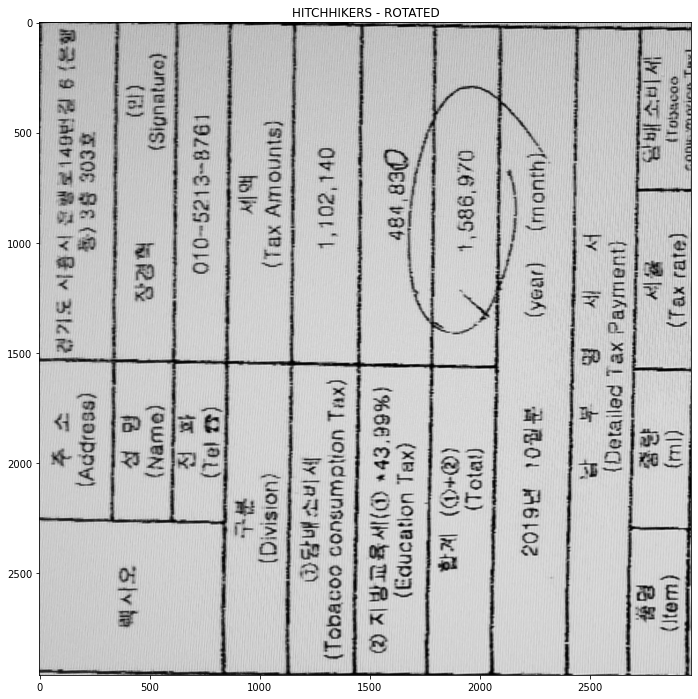

In [14]:
# Plot original image

image = cv2.imread(IMG_DIR + 'sample0.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('HITCHHIKERS - ROTATED')
plt.show()

In [15]:
# Get angle and script

osd = pytesseract.image_to_osd(image)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
script = re.search('(?<=Script: )\w+', osd).group(0)
print("angle: ", angle)
print("script: ", script)

TesseractError: (1, 'Tesseract Open Source OCR Engine v5.0.0-alpha.20210506 with Leptonica UZN file C:\\Users\\RBRAIN~1\\AppData\\Local\\Temp\\tess_zv6c9nd5 loaded. Estimating resolution as 626 UZN file C:\\Users\\RBRAIN~1\\AppData\\Local\\Temp\\tess_zv6c9nd5 loaded. Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')

### Playing around with the config

By making minor changes in the config file you can 
- specify language
- detect only digits
- whitelist characters
- blacklist characters
- work with multiple languages

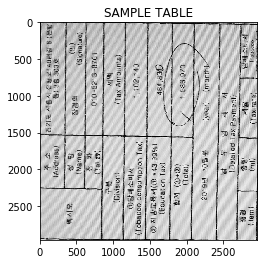

In [17]:
# Plot original image

image = cv2.imread(IMG_DIR + 'sample0.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('SAMPLE TABLE')
plt.show()

In [18]:
# Original tesseract output with english language sepcified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

a | ai f ' —q a $e
| au ae |
Maggot o j
uo ma | | i ||)
ae ol nl | Le, ey A
z By) a 3:
eee eee) | a 83
ye ir si = i a NI = |
We ; iti ‘ ' See mh Pont
uo? | po ta oO il oo em Hi) ue f
= a So coe) ‘ ral | i
eT ae a oe ee
: = ao | | a ee ol S ita! ,
oll = a;as
1 cee ig 7
; : ie)
, | a
} A oo |
Pe —,, ~—
~< —
a2laelee | 2/2 Ei
‘\ mm ee “a = IMs ) ca a aa
em) | se Tries a ine
left os Ea nn
1 <> es |
ee Os) os ee int
ae | sae ~ se
tsisSil=s fe
Olmolaci= Ss
0: a 3 int i
sl : oe ey
* | om ied
= Vee af
ere ee | Te


In [19]:
# Original tesseract output with english language sepcified

custom_config = r'-l kor --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

군    |  】     ,   서거 기 ㅡ-…-----개때때때때 -~ㅡ~~~-ㅡ<
| 30     이 내                     |     |
' 때      다                |      |            |     '
때     제 |    !    2
| 시    때 때 |                」      |            ㅣ     ]끼 버
길      502     그}
기 기기 이 이이                서고
| 23 |          2.        =ㅋ| 두      \}      개        | |        고뇌.
이  |            이지   '       ，    ~"    바       보배
|     | 0) 고 ㅇㅁㅇ   개     1  |  비.     또나        4  :
헤 0         드르 8 |  00』 | 께   ' 띠     ㅣ
077    00000 600    1 0 때
 ㅜ 0   |   |  이!   떠   | 떼
0] 0!                             =      2 | 떼 본
| 0                              00 을 ^
좁                              5               -
      ,            이
'                                            000 00,
~                   ~                     본
~  빠~
시 을 |글오늘 은     | |                  비
"\     (패 |         도  108  (그      때 가조
때 | | 0 오대! 40.0.75  ㅜㅜ ㅁ2 | 도   베     또 | | , (릴
버려도 0 고 0        0000]
|. 8       ^    이 더
미개 그 09 동 고트    0
0  0  자아  이
| 가

In [20]:
# Original tesseract output with english language sepcified

custom_config = r'-l kor+eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))
# custom_config = r'-l grc+tha+eng --oem 3 --psm 6'

a   |    |  f     ,   서거 a $e -~ㅡ~~~-ㅡ<
| au     ae                     |     |
' 때      다                |      |            |     '
uo     제 |    |                 |    i    ||)
 ae    ol 때 |     Le, ey A
z      502     그}
eee 기기 이 이이                서고
| 23 |          ir        si =      i      a        NI        = |
We  ;            iti   '       '    ~"    바       보배
| |     | 0) 고 oO   il     oo  |  em     Hi)        ue  :
=         드르 8 |  00』 | 께   ‘ ral      |     ㅣ
eT    00000 600    1 ee
 = ao   |   |   | ee  ol   S   ita!      ,
oll                             =      a;as
| 0                              cee 을 ^
;                              :               ie)
      ,                          |            a
'                                            A oo      |
~                   ~                     본
~  —
a2laelee     | 2/2                  Ei
‘\     mm |         =  IMs         )  (그      때 aa
때 | | se  Tries   a     ine
left os 0        Ea nn
1 8       <>    es     